Text(0.5,1,'Probability mass function fo a Posson random valiable, differing $\\lambda$ values')

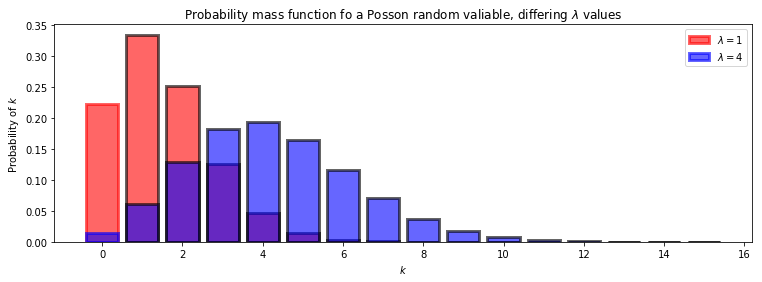

In [19]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline

figsize(12.5, 4)
poi = stats.poisson
lambda_ = [1.5, 4.25]

colors = ["red", "blue"]

#create Arithmetic progression
a = np.arange(16) 

#poisson.pmf(k) = exp(-mu) * mu**k / k! for k>0
#pmf: "probability mass function"
plt.bar(a, poi.pmf(a, lambda_[0]), color = colors[0], label = "$\lambda = %.1d$" % lambda_[0], alpha = 0.60,
        edgecolor=colors[0], lw = "3")
plt.bar(a, poi.pmf(a, lambda_[1]), color = colors[1], label = "$\lambda = %.1d$" % lambda_[1], alpha = 0.60,
        edgecolor=colors[1], lw = "3")

plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function fo a Posson random valiable, differing $\lambda$ values")

Text(0.5,1,'Probability density funtion of an exponential randam valiable, differing $\\lambda$ values')

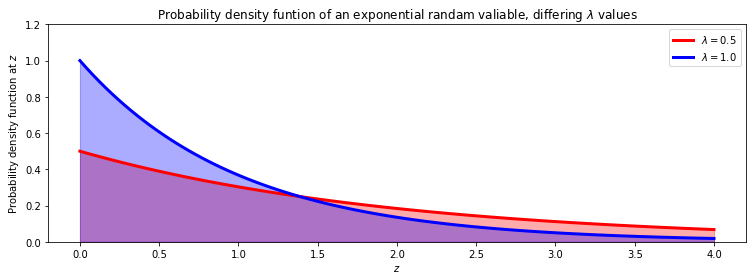

In [24]:
# create artithmetic progression, linspace(start, end, bin)
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors) :
    # 
    plt.plot(a, expo.pdf(a, scale = 1./l), lw=3, color=c, label = "$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale = 1./l), color=c, alpha=.33)
    
plt.legend()
plt.ylabel("Probability density function at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density funtion of an exponential randam valiable, differing $\lambda$ values")

(0, 74)

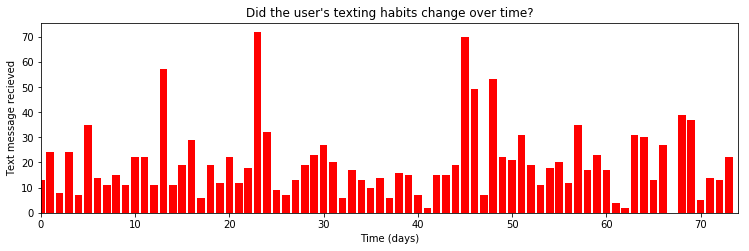

In [26]:
from os import makedirs

makedirs("data", exist_ok=True)

from urllib.request import urlretrieve

urlretrieve("https://git.io/vXTVC", "data/txtdata.csv")

figsize(12.5, 3.5)

count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color = "red")

plt.xlabel("Time (days)")
plt.ylabel("Text message recieved")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)